# IPL Analysis - 
### Data from first season in 2008 to the latest of 2022. This contains record of each ball bowled. 
#### Questions and Visulisations for - 
* Number of Games Each Season
* Most Runs by batters across all IPL
* Most Wickets by bowlers across all IPL
* Dimissal Types Across all IPL seasons
* Runs conceded in extras by all bowlers
* Finding Correlation between runs conceded in extras, over bowled and wickets taken
* How bolwers dimiss - wicket split of each bowler
* Bunny Function - Finds which batter has been dimissed the most by a bowler
* Economy Rates of Bowlers
* Striker Rates of Batters 
* Runs scored each season by all teams combined
* Breakup of runs scored by batters - 1s,2s,3s,4s,5s,6s
* Batters to bat against most teams
* Number of Wickets taken by a bolwer against each team 
* Runs scored by a batter against each team
* FINAL - An all player database with their scores, overs bowled, strike rate etc.

## Importing Libraries and EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import base64
import seaborn as sns

%matplotlib inline

In [2]:
ipl_df = pd.read_csv('all_matches.csv',low_memory = False)

#### Now, lets see some basic stats and info about our dataset

In [3]:
ipl_df.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
225949,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.3,Gujarat Titans,Rajasthan Royals,DA Miller,Shubman Gill,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225950,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.4,Gujarat Titans,Rajasthan Royals,Shubman Gill,DA Miller,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225951,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.5,Gujarat Titans,Rajasthan Royals,Shubman Gill,DA Miller,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225952,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.6,Gujarat Titans,Rajasthan Royals,DA Miller,Shubman Gill,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225953,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,18.1,Gujarat Titans,Rajasthan Royals,Shubman Gill,DA Miller,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   match_id                225954 non-null  int64  
 1   season                  225954 non-null  object 
 2   start_date              225954 non-null  object 
 3   venue                   225954 non-null  object 
 4   innings                 225954 non-null  int64  
 5   ball                    225954 non-null  float64
 6   batting_team            225954 non-null  object 
 7   bowling_team            225954 non-null  object 
 8   striker                 225954 non-null  object 
 9   non_striker             225954 non-null  object 
 10  bowler                  225954 non-null  object 
 11  runs_off_bat            225954 non-null  int64  
 12  extras                  225954 non-null  int64  
 13  wides                   7026 non-null    float64
 14  noballs             

In [5]:
ipl_df.describe()

,match_id,innings,ball,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,other_wicket_type,other_player_dismissed
count,2.259540e+05,225954.000000,225954.000000,225954.000000,225954.000000,7026.000000,918.000000,583.000000,3531.000000,2.0,0.0,0.0
mean,8.320470e+05,1.483868,9.547583,1.243523,0.066907,1.206234,1.038126,1.859348,1.301614,5.0,NaN,NaN
std,3.379542e+05,0.503104,5.683986,1.618166,0.341470,0.792866,0.342652,1.307175,0.843200,0.0,NaN,NaN
min,3.359820e+05,1.000000,0.100000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0,NaN,NaN
25%,5.012620e+05,1.000000,4.500000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0,NaN,NaN
50%,8.297370e+05,1.000000,9.400000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0,NaN,NaN
75%,1.178395e+06,2.000000,14.400000,1.000000,0.000000,1.000000,1.000000,4.000000,1.000000,5.0,NaN,NaN
max,1.312200e+06,6.000000,19.900000,6.000000,7.000000,5.000000,5.000000,4.000000,5.000000,5.0,NaN,NaN


In [6]:
ipl_df.shape

(225954, 22)

In [7]:
ipl_df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

##### Total number of games played so far 

In [8]:
ipl_df['match_id'].nunique()

950

##### Names of all Teams Participated


In [9]:
ipl_df['batting_team'].unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

##### Different Stadiums/Venues where IPL has been played

In [10]:

ipl_df['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Eden Gardens', 'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Brabourne Stadium, Mumbai',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Maharashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sh

## Number of Games Each Season

In [11]:
matches_each_season = ipl_df.groupby('season')['match_id'].nunique().reset_index().rename(columns={'id':'matches'})

In [12]:
matches_each_season

,season,match_id
0,2007/08,58
1,2009,57
2,2009/10,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


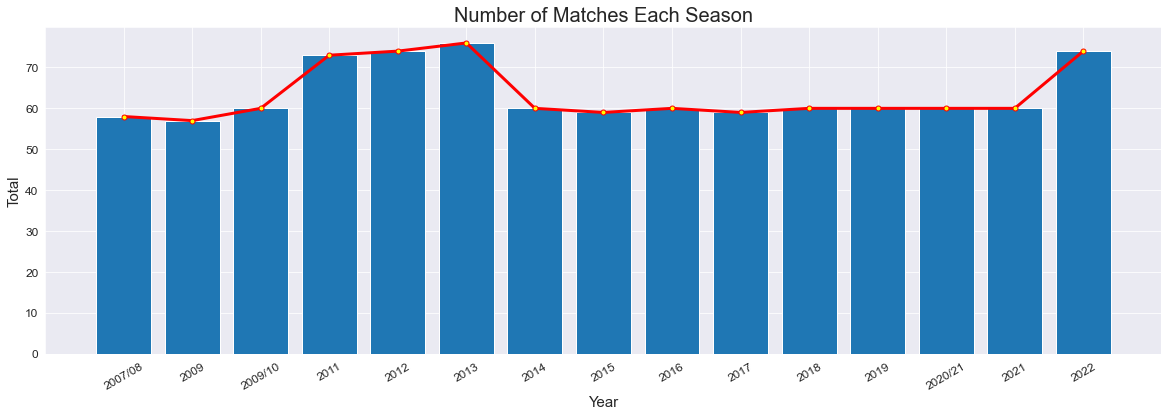

In [13]:
sns.set_style("darkgrid")
sns.color_palette("rocket")
plt.figure(figsize=(20,6))
plt.bar(matches_each_season.season,matches_each_season.match_id)
plt.plot(matches_each_season.season,matches_each_season.match_id,color = 'red',linewidth = 3,marker='o', markerfacecolor='yellow', markersize=5)
plt.title("Number of Matches Each Season",size = 20)
plt.xlabel("Year",size = 15)
plt.ylabel("Total",size = 15)
plt.xticks(rotation = 30,fontsize=12)
plt.yticks(fontsize=12);

## Runs Dataframe
#### To make it easier to do runs related calculations

In [14]:
total_runs = ipl_df.groupby('striker')['runs_off_bat'].sum().reset_index()

In [15]:
most_runs = total_runs.sort_values('runs_off_bat',ascending = False)

In [16]:
top10_run_scorers = most_runs.head(10)

In [17]:
top10_run_scorers

,striker,runs_off_bat
569,V Kohli,6634
462,S Dhawan,6244
130,DA Warner,5883
430,RG Sharma,5881
493,SK Raina,5536
27,AB de Villiers,5181
108,CH Gayle,4997
339,MS Dhoni,4978
452,RV Uthappa,4954
256,KD Karthik,4377


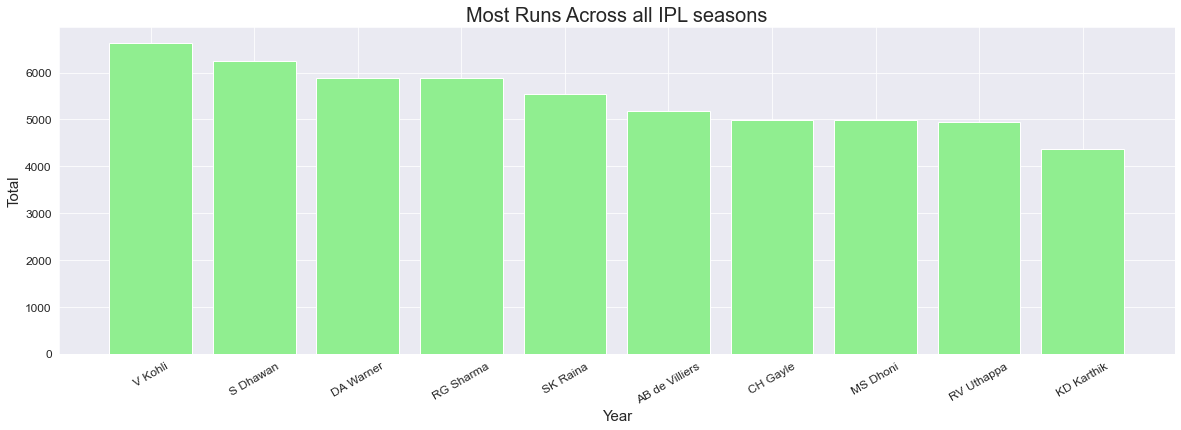

In [18]:
sns.set_style("darkgrid")
sns.color_palette("rocket")
plt.figure(figsize=(20,6))
plt.bar(top10_run_scorers.striker,top10_run_scorers.runs_off_bat,color = 'lightgreen')
plt.title("Most Runs Across all IPL seasons",size = 20)
plt.xlabel("Year",size = 15)
plt.ylabel("Total",size = 15)
plt.xticks(rotation = 30,fontsize=12)
plt.yticks(fontsize=12);

## Wickets Dataframe

In [19]:
total_wickets = ipl_df.groupby('bowler')[['wicket_type']].count().reset_index().rename(columns={'id':'Wickets'})

In [20]:
# Taking into count dimissals that are credited to bowler
bowling_df = ipl_df.loc[ipl_df['wicket_type'].isin(["bowled", "caught","stumped","caught and bowled","lbw","hit wicket"])]


In [21]:
total_wickets = bowling_df.groupby('bowler')[['wicket_type']].count().reset_index().rename(columns={'id':'Wickets'})

In [22]:
total_wickets.columns = ['bowler','Wickets']

In [23]:
total_wickets

,bowler,Wickets
0,A Ashish Reddy,18
1,A Badoni,2
2,A Chandila,11
3,A Choudhary,5
4,A Flintoff,2
...,...,...
400,YK Pathan,42
401,YS Chahal,166
402,Yash Dayal,11
403,Yuvraj Singh,36


In [24]:
most_wickets_top10 = total_wickets.sort_values('Wickets',ascending = False).head(10)
most_wickets_top10

,bowler,Wickets
92,DJ Bravo,183
337,SL Malinga,170
401,YS Chahal,166
6,A Mishra,166
268,PP Chawla,157
275,R Ashwin,157
53,B Kumar,154
344,SP Narine,152
128,Harbhajan Singh,150
156,JJ Bumrah,148


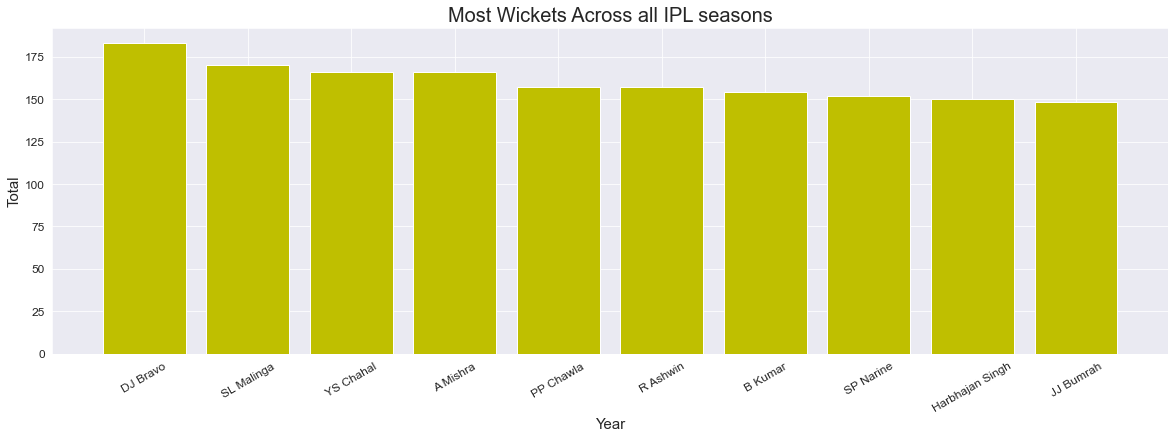

In [25]:
sns.set_style("darkgrid")
plt.figure(figsize=(20,6))
plt.bar(most_wickets_top10.bowler,most_wickets_top10.Wickets,color = 'y')
plt.title("Most Wickets Across all IPL seasons",size = 20)
plt.xlabel("Year",size = 15)
plt.ylabel("Total",size = 15)
plt.xticks(rotation = 30,fontsize=12)
plt.yticks(fontsize=12);

## Types of Dismissal
#### We will now see how players get dimissed

In [26]:
dismissal_type = ipl_df['wicket_type'].value_counts()

In [27]:
dismissal_type

caught                   6837
bowled                   1944
run out                  1007
lbw                       685
stumped                   325
caught and bowled         323
hit wicket                 14
retired hurt               13
obstructing the field       2
retired out                 1
Name: wicket_type, dtype: int64

In [28]:
dismissal_type = dismissal_type.to_frame().reset_index()

In [29]:
dismissal_type.columns = ['Dismissal_Type','Wickets']

In [30]:
dismissal_type

,Dismissal_Type,Wickets
0,caught,6837
1,bowled,1944
2,run out,1007
3,lbw,685
4,stumped,325
5,caught and bowled,323
6,hit wicket,14
7,retired hurt,13
8,obstructing the field,2
9,retired out,1


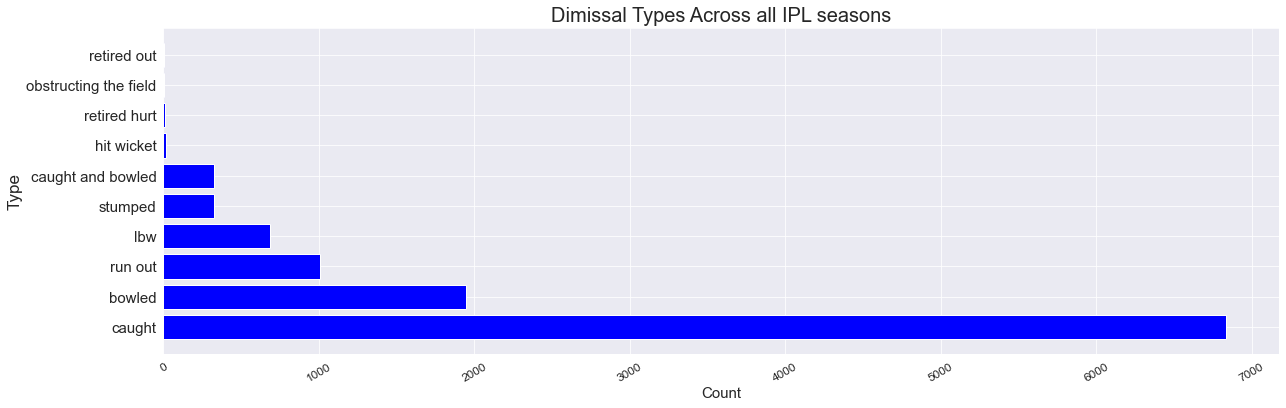

In [31]:
sns.set_style("darkgrid")
plt.figure(figsize=(20,6))
plt.barh(dismissal_type.Dismissal_Type,dismissal_type.Wickets,color = 'b')
plt.title("Dimissal Types Across all IPL seasons",size = 20)
plt.xlabel("Count",size = 15)
plt.ylabel("Type",size = 17)
plt.xticks(rotation = 30,fontsize=12)
plt.yticks(fontsize=15);

##### Whats Surprising in the above? There have been more run-outs than LBW's 

#### Since there were only two players who got out Obstructing the Field, Lets find who they are and other details. 

In [32]:
obstructing_the_field = ipl_df.loc[ipl_df['wicket_type'] == 'obstructing the field']

In [33]:
obstructing_the_field

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
92241,598061,2013,2013-05-15,JSCA International Stadium Complex,2,17.5,Kolkata Knight Riders,Pune Warriors,YK Pathan,DB Das,...,0,NaN,NaN,NaN,NaN,NaN,obstructing the field,YK Pathan,NaN,NaN
178570,1181766,2019,2019-05-08,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,2,19.5,Delhi Capitals,Sunrisers Hyderabad,A Mishra,KMA Paul,...,0,NaN,NaN,NaN,NaN,NaN,obstructing the field,A Mishra,NaN,NaN


## Extras Conceded By Bowlers

In [34]:
extras_by_bowler = ipl_df.groupby('bowler')[['extras']].sum().reset_index().rename(columns={'id':'bowler'})

In [35]:
extras_by_bowler.sort_values('extras',ascending = False)

,bowler,extras
394,SL Malinga,292
109,DJ Bravo,258
444,UT Yadav,250
63,B Kumar,246
298,P Kumar,236
...,...,...
335,RA Shaikh,0
129,F du Plessis,0
132,FY Fazal,0
79,C Ganapathy,0


In [338]:
extras_by_bowler.sort_values('extras',ascending = False).head(10)

,bowler,extras
394,SL Malinga,292
109,DJ Bravo,258
444,UT Yadav,250
63,B Kumar,246
298,P Kumar,236
318,R Ashwin,209
178,JJ Bumrah,201
155,I Sharma,197
345,RP Singh,181
128,DW Steyn,177


### Finding Correlations between Extras Conceded, Wickets taken and Overs bowled

In [36]:
total_wickets

,bowler,Wickets
0,A Ashish Reddy,18
1,A Badoni,2
2,A Chandila,11
3,A Choudhary,5
4,A Flintoff,2
...,...,...
400,YK Pathan,42
401,YS Chahal,166
402,Yash Dayal,11
403,Yuvraj Singh,36


In [37]:
most_wickets_top10

,bowler,Wickets
92,DJ Bravo,183
337,SL Malinga,170
401,YS Chahal,166
6,A Mishra,166
268,PP Chawla,157
275,R Ashwin,157
53,B Kumar,154
344,SP Narine,152
128,Harbhajan Singh,150
156,JJ Bumrah,148


#### We now merge tables that we have created to find the relevant information

In [38]:
merged_df = pd.merge(extras_by_bowler, total_wickets, on='bowler')

In [39]:
merged_df.sort_values('extras',ascending = False)

,bowler,extras,Wickets
337,SL Malinga,292,170
92,DJ Bravo,258,183
379,UT Yadav,250,135
53,B Kumar,246,154
257,P Kumar,236,90
...,...,...,...
64,BMAJ Mendis,0,1
279,R Ninan,0,3
21,AC Gilchrist,0,1
359,Shivam Sharma,0,4


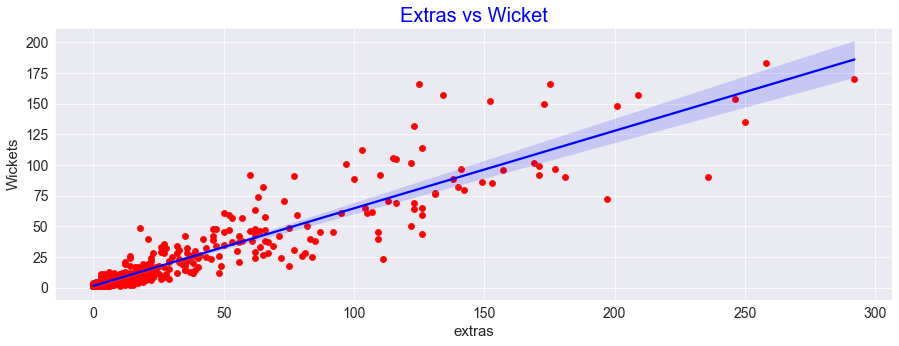

In [41]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=merged_df.extras, y= merged_df.Wickets,color = 'r')
plt.title('Extras vs Wicket',size = 20,c = 'b')
plt.xlabel("Extras",size = 15)
plt.ylabel("Wickets",size = 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.regplot(x='extras',y='Wickets',data =merged_df,scatter_kws = {"color":"red"},line_kws={"color":"blue"} );

#### Finding number of Overs bowled 

In [ ]:
balls_bowled = ipl_df.groupby('bowler')[['ball']].count()

In [43]:
overs_bowled = round(balls_bowled/6)

In [44]:
overs_bowled = overs_bowled.astype(int)
overs_bowled = overs_bowled.rename(columns={"ball":"Overs"})

In [45]:
overs_bowled

,Overs
bowler,
A Ashish Reddy,45
A Badoni,2
A Chandila,39
A Choudhary,18
A Dananjaya,4
...,...
YK Pathan,197
YS Chahal,490
Yash Dayal,34


##### Finding Relation between number of overs bowled and wickets taken

In [47]:
wicket_to_over = pd.merge(overs_bowled, total_wickets, on='bowler')

In [48]:
wicket_to_over

,bowler,Overs,Wickets
0,A Ashish Reddy,45,18
1,A Badoni,2,2
2,A Chandila,39,11
3,A Choudhary,18,5
4,A Flintoff,11,2
...,...,...,...
400,YK Pathan,197,42
401,YS Chahal,490,166
402,Yash Dayal,34,11
403,Yuvraj Singh,147,36


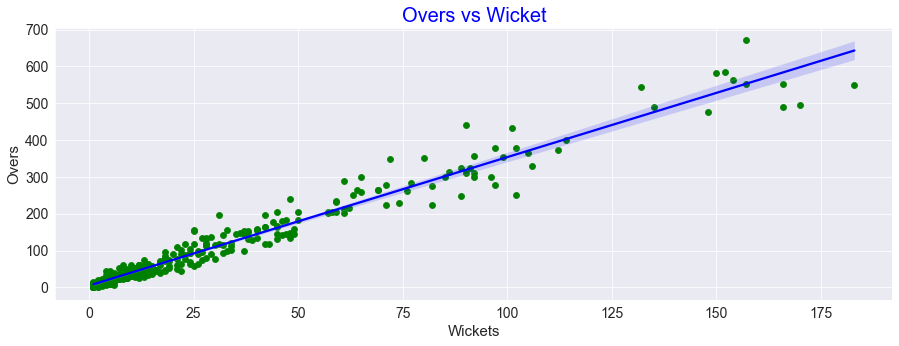

In [85]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=wicket_to_over.Wickets, y= wicket_to_over.Overs,color = 'green')
plt.title('Overs vs Wicket',size = 20,c = 'b')
plt.xlabel("Count of Wickets",size = 15)
plt.ylabel("Overs",size = 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.regplot(x='Wickets',y='Overs',data =wicket_to_over,scatter_kws = {"color":"green"},line_kws={"color":"blue"} );

#### Extras vs Overs

In [51]:
extras_to_over = pd.merge(overs_bowled, extras_by_bowler, on='bowler')

In [52]:
extras_to_over

,bowler,Overs,extras
0,A Ashish Reddy,45,14
1,A Badoni,2,1
2,A Chandila,39,3
3,A Choudhary,18,7
4,A Dananjaya,4,1
...,...,...,...
468,YK Pathan,197,71
469,YS Chahal,490,175
470,Yash Dayal,34,13
471,Yuvraj Singh,147,27


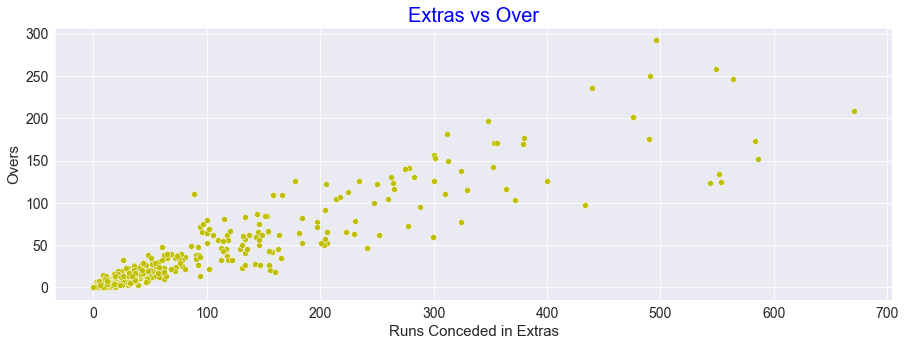

In [53]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=extras_to_over.Overs, y= extras_to_over.extras,color = 'y')
plt.title('Extras vs Over',size = 20,c = 'b')
plt.xlabel("Runs Conceded in Extras",size = 15)
plt.ylabel("Overs",size = 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

## Wicket_Split
### How each bowler got his wickets (Modes of Dismissals)

In [54]:
wicket_type_bowler = bowling_df.groupby('bowler')['wicket_type'].value_counts()

In [55]:
wicket_type_bowler.columns = ['bowler','wicket_type']

In [56]:
wicket_type_bowler

bowler          wicket_type      
A Ashish Reddy  caught                8
                bowled                6
                lbw                   3
                caught and bowled     1
A Badoni        caught                1
                                     ..
Yuvraj Singh    lbw                   2
Z Khan          caught               70
                bowled               22
                lbw                   9
                caught and bowled     1
Name: wicket_type, Length: 1123, dtype: int64

##### Since the above is not very pleasing and useful, we will transpose it

In [58]:
wicket_type_bowler_df = wicket_type_bowler.transpose()

In [59]:
wicket_type_bowler_df

bowler          wicket_type      
A Ashish Reddy  caught                8
                bowled                6
                lbw                   3
                caught and bowled     1
A Badoni        caught                1
                                     ..
Yuvraj Singh    lbw                   2
Z Khan          caught               70
                bowled               22
                lbw                   9
                caught and bowled     1
Name: wicket_type, Length: 1123, dtype: int64

In [60]:
def count(group):
    cg = group.value_counts()
    return cg.to_frame().transpose()
wicket_type_bowler = bowling_df.groupby('bowler')['wicket_type'].apply(count)

In [61]:
wicket_type_bowler

,,caught,bowled,lbw,caught and bowled,stumped,hit wicket
bowler,,,,,,,
A Ashish Reddy,A Ashish Reddy,8.0,6.0,3.0,1.0,NaN,NaN
A Badoni,A Badoni,1.0,NaN,NaN,1.0,NaN,NaN
A Chandila,A Chandila,4.0,NaN,NaN,5.0,2.0,NaN
A Choudhary,A Choudhary,5.0,NaN,NaN,NaN,NaN,NaN
A Flintoff,A Flintoff,1.0,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...
YK Pathan,YK Pathan,21.0,10.0,5.0,2.0,4.0,NaN
YS Chahal,YS Chahal,101.0,33.0,13.0,3.0,16.0,NaN
Yash Dayal,Yash Dayal,11.0,NaN,NaN,NaN,NaN,NaN


##### Above dataset is messy, we clean it now

In [63]:
wicket_type_bowler_total=wicket_type_bowler.replace(np.nan, 0)

In [64]:
wicket_type_bowler_total

,,caught,bowled,lbw,caught and bowled,stumped,hit wicket
bowler,,,,,,,
A Ashish Reddy,A Ashish Reddy,8.0,6.0,3.0,1.0,0.0,0.0
A Badoni,A Badoni,1.0,0.0,0.0,1.0,0.0,0.0
A Chandila,A Chandila,4.0,0.0,0.0,5.0,2.0,0.0
A Choudhary,A Choudhary,5.0,0.0,0.0,0.0,0.0,0.0
A Flintoff,A Flintoff,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
YK Pathan,YK Pathan,21.0,10.0,5.0,2.0,4.0,0.0
YS Chahal,YS Chahal,101.0,33.0,13.0,3.0,16.0,0.0
Yash Dayal,Yash Dayal,11.0,0.0,0.0,0.0,0.0,0.0


##### We will now add a new column 'total' which is sum of all wickets taken by the bowler

In [65]:

wicket_type_bowler_total['total'] = wicket_type_bowler_total.sum(axis=1)

In [66]:
wicket_type_bowler_total.drop("total", axis=1, inplace=True)


In [67]:
wicket_type_bowler_total = wicket_type_bowler_total.astype(int)

In [68]:
wicket_type_bowler_total['total'] = wicket_type_bowler_total.sum(axis=1)

In [69]:
wicket_type_bowler_total

,,caught,bowled,lbw,caught and bowled,stumped,hit wicket,total
bowler,,,,,,,,
A Ashish Reddy,A Ashish Reddy,8,6,3,1,0,0,18
A Badoni,A Badoni,1,0,0,1,0,0,2
A Chandila,A Chandila,4,0,0,5,2,0,11
A Choudhary,A Choudhary,5,0,0,0,0,0,5
A Flintoff,A Flintoff,1,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...
YK Pathan,YK Pathan,21,10,5,2,4,0,42
YS Chahal,YS Chahal,101,33,13,3,16,0,166
Yash Dayal,Yash Dayal,11,0,0,0,0,0,11


In [70]:
wicket_split_ = wicket_type_bowler_total.sort_values('total',ascending = False)

In [71]:
wicket_split_ = wicket_split_.reset_index().rename(columns={'id':'bowler'})

###  We can also filter out the above based on bowled,caught,lbw etc.


In [276]:
wicket_split_ = wicket_type_bowler_total.sort_values('bowled',ascending = False)

In [277]:
wicket_split_

,,caught,bowled,lbw,caught and bowled,stumped,hit wicket,total
bowler,,,,,,,,
SL Malinga,SL Malinga,90,63,11,6,0,0,170
SP Narine,SP Narine,68,43,22,8,11,0,152
PP Chawla,PP Chawla,75,43,17,6,16,0,157
B Kumar,B Kumar,103,36,9,5,1,0,154
RA Jadeja,RA Jadeja,72,34,13,5,8,0,132
...,...,...,...,...,...,...,...,...
OF Smith,OF Smith,6,0,0,0,0,0,6
Ankit Soni,Ankit Soni,1,0,1,0,0,0,2
P Sahu,P Sahu,1,0,1,0,1,0,3


In [72]:
top_10_split = wicket_split_.head(10)

#### The above gives us a breakup of how bowlers dismiss.

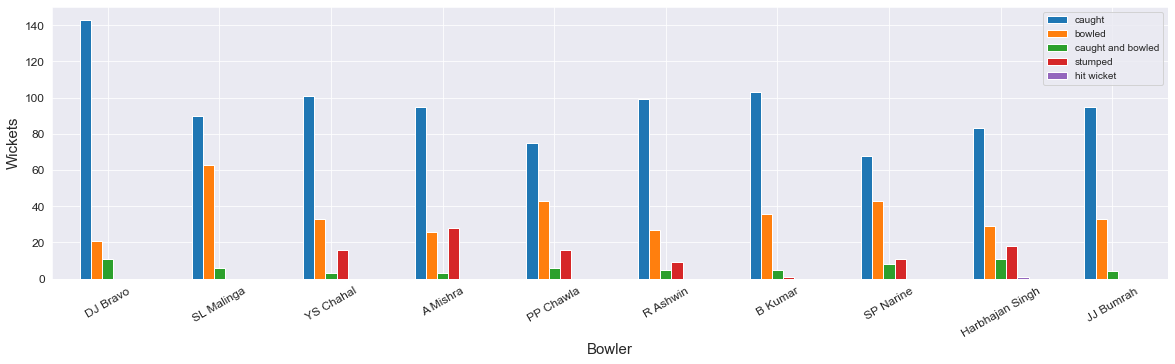

In [75]:
## Now, lets visualise this
plt.rcParams["figure.figsize"] = (20, 5)
top_10_split.plot(x="bowler", y=["caught", "bowled", "caught and bowled","stumped","hit wicket"], kind="bar")
plt.xlabel('Bowler',size = 15)
plt.ylabel('Wickets',size = 15)
plt.xticks(rotation = 30,size = 12)
plt.yticks(size = 12);

#### Whats interesting in the above - SL Malings in a league of his own when it comes to bowling batters out. Yorker king for a reason.

# Bunny
#### We will now see which batter gets dimissed by a bowler the most.

In [76]:
## We will write a couple of functions to get desired output.

In [77]:
def count(group):
    cg = group.value_counts()
    return cg.to_frame().transpose()
bowler_batter = bowling_df.groupby('bowler')['player_dismissed'].apply(count)

In [78]:
bowler_batter = bowler_batter.replace(np.nan, 0)
bowler_batter= bowler_batter.astype(int)

In [79]:
bowler_batter.head(5)

,,RV Uthappa,V Kohli,MN Samuels,JEC Franklin,RA Jadeja,MA Agarwal,N Saini,Mandeep Singh,R Vinay Kumar,M Muralitharan,...,M Ntini,A Nortje,Arshdeep Singh,SS Cottrell,TM Srivastava,LA Carseldine,KJ Abbott,KS Sharma,KAJ Roach,VS Malik
bowler,,,,,,,,,,,,,,,,,,,,,,
A Ashish Reddy,A Ashish Reddy,3,2,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
A Badoni,A Badoni,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A Chandila,A Chandila,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
A Choudhary,A Choudhary,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A Flintoff,A Flintoff,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### We will now create a user input based function where user can see the Bolwer's Bunny themselves, 
##### Just enter the bowlers name in the input box

In [81]:
def bunny():
    bowler_name = input("Enter the name of bowler to find his bunny: ")
    #print('The bolwer is: ',bowler_name)
    
    if bowler_name in bowler_batter:
        bowler_specs = bowler_batter.loc[bowler_name].sum().sort_values(ascending = False)
        bowler_specs_ = bowler_specs.to_frame().reset_index()
        bowler_specs_.columns = ['Batsman','Count']
        total_ = bowler_specs_[bowler_specs_['Count'] > 0]
        
        return total_,('Total Wickets: ',sum(total_['Count']))
    else:
        print('The bowler hasnt bowled in IPL')

In [86]:
bunny()

Enter the name of bowler to find his bunny: Sandeep Sharma


(          Batsman  Count
 0         V Kohli      7
 1       RG Sharma      4
 2        CH Gayle      4
 3        PA Patel      3
 4      MA Agarwal      3
 ..            ...    ...
 69        M Vijay      1
 70    NLTC Perera      1
 71  Mandeep Singh      1
 72      RA Jadeja      1
 73     KA Pollard      1
 
 [74 rows x 2 columns],
 ('Total Wickets: ', 114))

### As can be seen, Sandeep Sharma's Bunny is V Kohli.
#### We will now test the function to see if it works if the input is wrong or a player who hasnt played IPL

In [88]:
bunny()

Enter the name of bowler to find his bunny: Wasim Akram
The bowler hasnt bowled in IPL


## Bowlers Economy

#### Bowler Economy = Runs Conceded / Number of overs bowled
##### We will now create multiple small tables based on our use case

In [89]:
ipl_df['total_runs'] = ipl_df['runs_off_bat'] + ipl_df['extras']

In [90]:
runs_conceded = ipl_df.groupby('bowler')[['total_runs']].sum()

In [91]:
runs_conceded.sort_values('total_runs',ascending = False)

,total_runs
bowler,
R Ashwin,4596
DJ Bravo,4436
PP Chawla,4368
RA Jadeja,4114
Harbhajan Singh,4101
...,...
SN Khan,6
AM Rahane,5
SPD Smith,5


In [ ]:
overs_bowled = overs_bowled.rename(columns={"ball":"overs"})

In [ ]:
overs_bowled

In [93]:
over_runs= pd.merge(runs_conceded,overs_bowled,on = 'bowler')

#### Finding Economy Rate
##### We add a new column 'Economy'

In [94]:

over_runs['Economy'] = round(over_runs['total_runs']/over_runs['Overs'],2)

In [95]:
over_runs

,total_runs,Overs,Economy
bowler,,,
A Ashish Reddy,400,45,8.89
A Badoni,12,2,6.00
A Chandila,245,39,6.28
A Choudhary,144,18,8.00
A Dananjaya,47,4,11.75
...,...,...,...
YK Pathan,1443,197,7.32
YS Chahal,3699,490,7.55
Yash Dayal,296,34,8.71


### We have many bowlers in the dataset, many of them being part-timers (who dont bowl much) .
#### We will now filter them out depending on the number of overs they have bowled to make data more meaningful

In [97]:
filtered_over_runs = over_runs[over_runs['Overs'] > 100]

In [98]:
filtered_over_runs

,total_runs,Overs,Economy
bowler,,,
A Kumble,1089,164,6.64
A Mishra,4022,553,7.27
A Nehra,2537,329,7.71
A Nortje,946,118,8.02
AB Agarkar,1174,137,8.57
...,...,...,...
Washington Sundar,1116,155,7.20
YK Pathan,1443,197,7.32
YS Chahal,3699,490,7.55


In [99]:
# we now need to sort by Economy-
filtered_over_runs_ = filtered_over_runs.sort_values('Economy').head(15).reset_index().rename(columns={'id':'bowler'})

In [100]:
filtered_over_runs_

,bowler,total_runs,Overs,Economy
0,Rashid Khan,2411,372,6.48
1,A Kumble,1089,164,6.64
2,SP Narine,3907,586,6.67
3,M Muralitharan,1765,264,6.69
4,DW Steyn,2583,380,6.80
5,DL Vettori,894,131,6.82
6,R Ashwin,4596,671,6.85
7,J Botha,818,118,6.93
8,SL Malinga,3486,496,7.03
9,Harbhajan Singh,4101,583,7.03


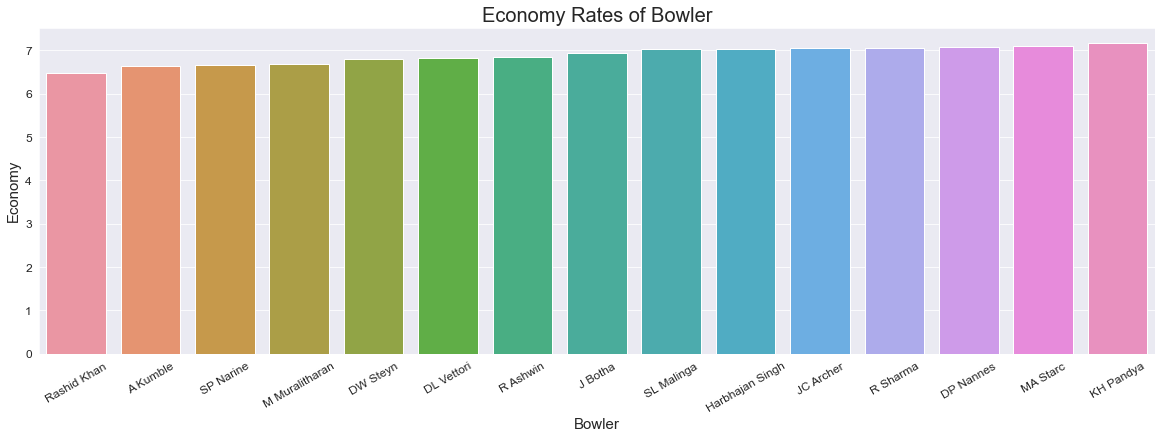

In [101]:
plt.figure(figsize=(20,6))
sns.barplot(x="bowler", y="Economy", data=filtered_over_runs_)
plt.xlabel('Bowler',size = 15)
plt.ylabel('Economy',size = 15)
plt.xticks(rotation = 30,size = 12)
plt.yticks(size = 12)
plt.title('Economy Rates of Bowler',size = 20);

## Batter Strike Rates

#### Batter Strike Rate = Runs Scored / Number of balls faced. 
##### We will now create small relevant tables and use them

In [102]:
most_runs.shape

(605, 2)

In [103]:
balls_faced = ipl_df.groupby('striker')[['ball']].count().reset_index().rename(columns={'id':'striker'})

In [104]:
balls_faced= balls_faced.sort_values('ball',ascending = False)

In [105]:
balls_faced

,striker,ball
569,V Kohli,5266
462,S Dhawan,5083
430,RG Sharma,4632
130,DA Warner,4313
493,SK Raina,4177
...,...,...
154,DP Vijaykumar,1
570,V Pratap Singh,1
438,RP Meredith,1
102,C Nanda,1


In [106]:
strike_rate = pd.merge(balls_faced,most_runs,on = 'striker')

In [107]:
strike_rate['strike_rate'] = round((strike_rate['runs_off_bat'] / strike_rate['ball'])*100,2)

In [108]:
strike_rate

,striker,ball,runs_off_bat,strike_rate
0,V Kohli,5266,6634,125.98
1,S Dhawan,5083,6244,122.84
2,RG Sharma,4632,5881,126.96
3,DA Warner,4313,5883,136.40
4,SK Raina,4177,5536,132.54
...,...,...,...,...
600,DP Vijaykumar,1,1,100.00
601,V Pratap Singh,1,0,0.00
602,RP Meredith,1,0,0.00
603,C Nanda,1,0,0.00


#### We have over 600 batters. We cant just sort this by strike rate since it will take abberrations into account. 
##### example - a batter only batted twice and hit a boundary, which inflates his strike rate even though he played only 2 balls.
##### we will not filter this for batters who have played over 1500 balls

In [192]:
strike_rate_ = strike_rate[strike_rate['ball'] > 1500].sort_values('strike_rate',ascending = False)

In [185]:
top10_strikerate=strike_rate_.head(10)

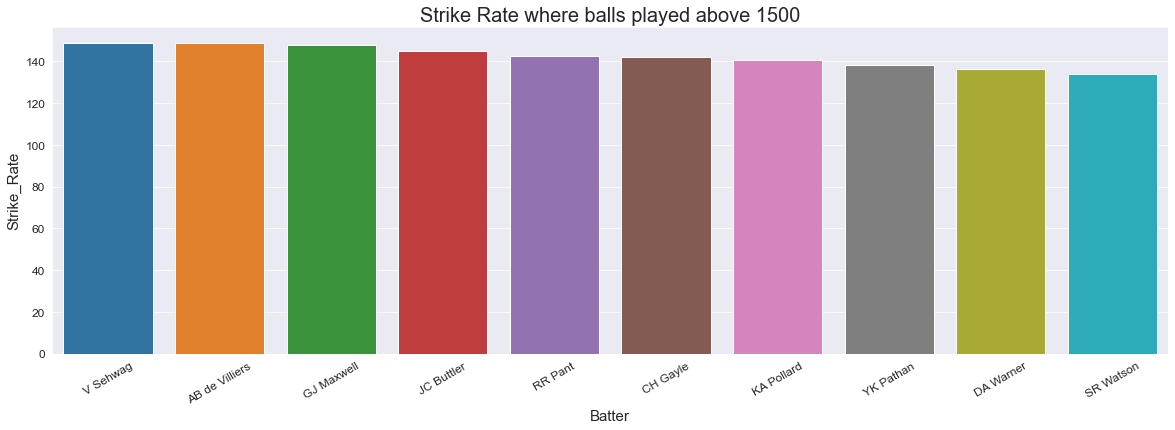

In [186]:
plt.figure(figsize=(20,6))
sns.barplot(x="striker", y="strike_rate", data=top10_strikerate)
plt.xlabel('Batter',size = 15)
plt.ylabel('Strike_Rate',size = 15)
plt.xticks(rotation = 30,size = 12)
plt.yticks(size = 12)
plt.title('Strike Rate where balls played above 1500',size = 20);

#### We will now visualise all batters who have faced over 100 balls. 

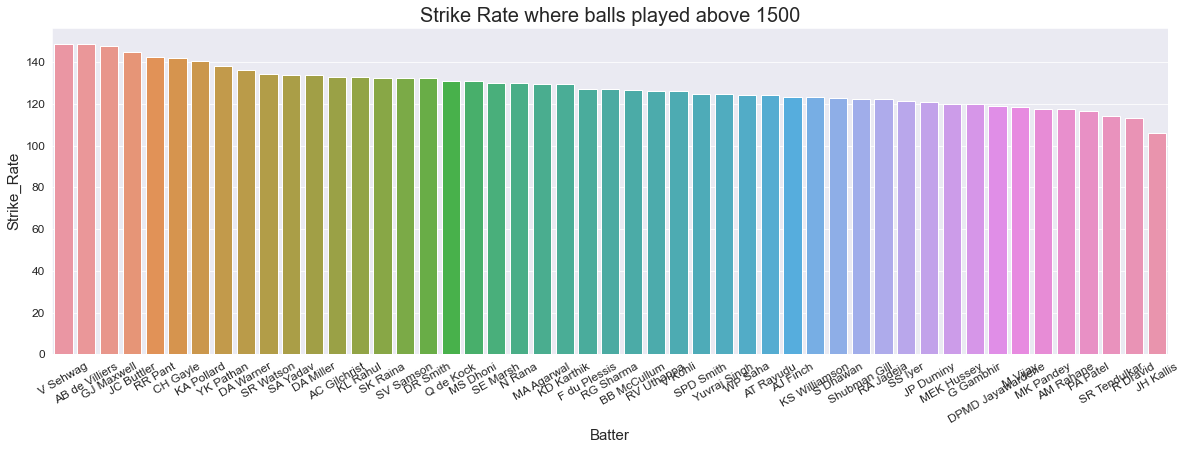

In [187]:
plt.figure(figsize=(20,6))
sns.barplot(x="striker", y="strike_rate", data=strike_rate_)
plt.xlabel('Batter',size = 15)
plt.ylabel('Strike_Rate',size = 15)
plt.xticks(rotation = 30,size = 12)
plt.yticks(size = 12)
plt.title('Strike Rate where balls played above 1500',size = 20);

#### AB De Villiers shows remarkable strike rate and consistency.  

## Runs Scored Each Season by all teams combined in IPL

In [114]:
runs_each_season = ipl_df.groupby('season')['total_runs'].sum()

In [115]:
runs_each_season

season
2007/08    17937
2009       16353
2009/10    18883
2011       21154
2012       22453
2013       22602
2014       18931
2015       18353
2016       18862
2017       18786
2018       19901
2019       19434
2020/21    19416
2021       18637
2022       24395
Name: total_runs, dtype: int64

In [120]:
runs_each_season = runs_each_season.to_frame().reset_index()

In [118]:
runs_each_season.columns = ['Season','Runs']

In [119]:
runs_each_season

,Season,Runs
0,2007/08,17937
1,2009,16353
2,2009/10,18883
3,2011,21154
4,2012,22453
5,2013,22602
6,2014,18931
7,2015,18353
8,2016,18862
9,2017,18786


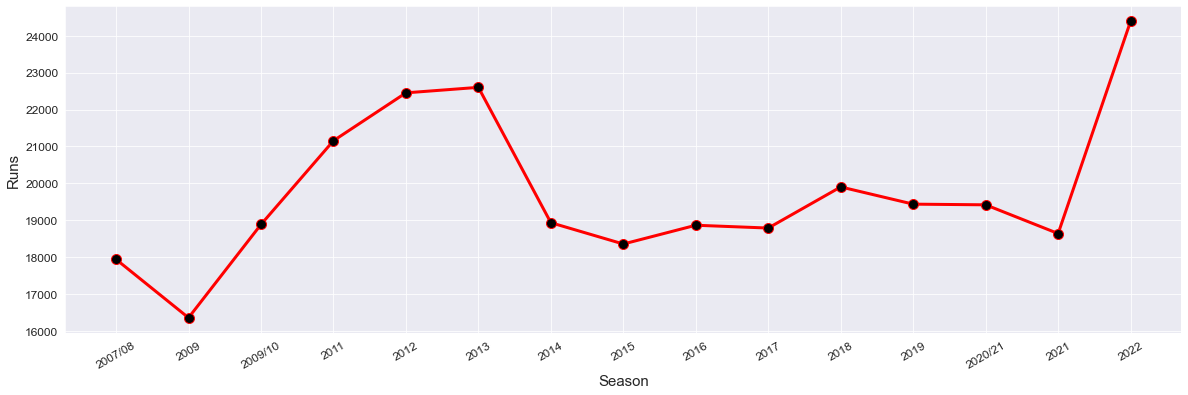

In [121]:
plt.figure(figsize=(20,6))
plt.plot(runs_each_season.Season,runs_each_season.Runs,'o-r',linewidth = 3, markerfacecolor='black', markersize=10)
plt.xlabel('Season',size = 15)
plt.ylabel('Runs',size = 15)
plt.xticks(rotation = 30,size = 12)
plt.yticks(size = 12);


## How Batters Score
#### We will now see how batters get their runs. i.e. breakdown of all their runs. 

In [122]:
runs_df = ipl_df[['striker','runs_off_bat','bowler']]

In [123]:
runs_df

,striker,runs_off_bat,bowler
0,SC Ganguly,0,P Kumar
1,BB McCullum,0,P Kumar
2,BB McCullum,0,P Kumar
3,BB McCullum,0,P Kumar
4,BB McCullum,0,P Kumar
...,...,...,...
225949,DA Miller,1,R Ashwin
225950,Shubman Gill,0,R Ashwin
225951,Shubman Gill,1,R Ashwin
225952,DA Miller,2,R Ashwin


In [124]:
def count(group):
    cg = group.value_counts()
    return cg.to_frame().transpose()
run_type_ = runs_df.groupby('striker')['runs_off_bat'].apply(count)

In [125]:
run_type_


,,0,1,2,3,4,5,6
striker,,,,,,,,
A Ashish Reddy,A Ashish Reddy,61.0,83.0,20.0,1.0,16.0,NaN,15.0
A Badoni,A Badoni,57.0,53.0,11.0,NaN,11.0,NaN,7.0
A Chandila,A Chandila,3.0,4.0,NaN,NaN,NaN,NaN,NaN
A Chopra,A Chopra,45.0,21.0,2.0,NaN,7.0,NaN,NaN
A Choudhary,A Choudhary,4.0,13.0,1.0,NaN,1.0,NaN,1.0
...,...,...,...,...,...,...,...,...
Yash Dayal,Yash Dayal,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Yashpal Singh,Yashpal Singh,39.0,20.0,2.0,1.0,5.0,NaN,NaN
Younis Khan,Younis Khan,4.0,3.0,NaN,NaN,NaN,NaN,NaN


In [126]:
run_type_ = run_type_.replace(np.nan, 0)
run_type_= run_type_.astype(int)

In [128]:
run_type_.reset_index(level=0, inplace=True)

In [129]:
run_type_

,striker,0,1,2,3,4,5,6
A Ashish Reddy,A Ashish Reddy,61,83,20,1,16,0,15
A Badoni,A Badoni,57,53,11,0,11,0,7
A Chandila,A Chandila,3,4,0,0,0,0,0
A Chopra,A Chopra,45,21,2,0,7,0,0
A Choudhary,A Choudhary,4,13,1,0,1,0,1
...,...,...,...,...,...,...,...,...
Yash Dayal,Yash Dayal,1,0,0,0,0,0,0
Yashpal Singh,Yashpal Singh,39,20,2,1,5,0,0
Younis Khan,Younis Khan,4,3,0,0,0,0,0
Yuvraj Singh,Yuvraj Singh,977,741,119,3,218,0,149


#### We now have a matrix of how a batsman scores his runs. We can find who scored most 1s,2s,3s etc. Lets see who scored most 6s


In [280]:
run_type_.sort_values(6,ascending = False).head(10)

,striker,0,1,2,3,4,5,6
CH Gayle,CH Gayle,1636,1018,92,3,408,0,359
AB de Villiers,AB de Villiers,1115,1420,268,17,414,0,253
RG Sharma,RG Sharma,1779,1837,248,7,519,1,241
MS Dhoni,MS Dhoni,1370,1509,333,15,346,0,229
KA Pollard,KA Pollard,967,872,154,8,221,1,224
V Kohli,V Kohli,1886,2183,378,19,581,0,219
DA Warner,DA Warner,1636,1515,345,23,577,1,216
SK Raina,SK Raina,1476,1708,271,11,506,1,204
SR Watson,SR Watson,1248,933,135,8,377,1,190
RV Uthappa,RV Uthappa,1598,1418,230,15,481,3,182


#### We can also see how each batsman scores. Just replace the name to the desired one.
##### Ex - CH Gayle

In [132]:
batter_spec=  run_type_.loc['CH Gayle']

In [133]:
batter_spec

striker    CH Gayle
0              1636
1              1018
2                92
3                 3
4               408
5                 0
6               359
Name: CH Gayle, dtype: object

## We will now see which batsmen have batted against most number of teams

In [139]:
played_against = ipl_df[['bowling_team','striker','runs_off_bat']]

In [142]:
played_against = played_against.groupby('striker')['bowling_team'].nunique().reset_index()

In [144]:
played_against.sort_values('bowling_team',ascending=False).head(20)

,striker,bowling_team
462,S Dhawan,18
60,AT Rayudu,18
256,KD Karthik,17
587,WP Saha,17
452,RV Uthappa,17
130,DA Warner,17
430,RG Sharma,17
569,V Kohli,17
480,SA Yadav,16
183,GJ Maxwell,16


#### The above stat tells us players who have played since the beginning of IPL has had most chances to play against different teams. Mandeep Singh is the only player in the list who hasnt been capped often for the national team. 

## Wickets vs Each team

#### This will give us a breakdown of wickets of a bowler vs each team

In [309]:
wickets_against = ipl_df[['batting_team','bowler','wicket_type']]

In [311]:
wickets_against_fil = wickets_against.loc[ipl_df['wicket_type'].isin(["bowled", "caught","stumped","caught and bowled","lbw","hit wicket"])]

In [313]:
wickets_against_fil =  wickets_against_fil.groupby(['batting_team','bowler'])['wicket_type'].count().reset_index()

In [320]:
wickets_against_fil.columns = ['batting_team','bowler','count_of_wicket']

#### The below table gives a breakup of a number of wickets by a bowler against every team. For example - we can wickets taken by all bowlers against 'Chennai Super Kings'. 

In [321]:
wickets_against_fil

,batting_team,bowler,count_of_wicket
0,Chennai Super Kings,A Ashish Reddy,2
1,Chennai Super Kings,A Chandila,1
2,Chennai Super Kings,A Kumble,7
3,Chennai Super Kings,A Mishra,13
4,Chennai Super Kings,A Mithun,2
...,...,...,...
2367,Sunrisers Hyderabad,YK Pathan,1
2368,Sunrisers Hyderabad,YS Chahal,20
2369,Sunrisers Hyderabad,Yash Dayal,1
2370,Sunrisers Hyderabad,Yuvraj Singh,1


#### To make more use of this info, we can sort these by different columns that we have. For now, we will sort it by wicket_type

In [328]:
wickets_against_fil.sort_values('count_of_wicket',ascending = False).head(10)

,batting_team,bowler,count_of_wicket
1337,Mumbai Indians,DJ Bravo,33
182,Chennai Super Kings,SL Malinga,31
1024,Kolkata Knight Riders,B Kumar,30
1672,Rajasthan Royals,A Mishra,30
938,Kings XI Punjab,UT Yadav,29
920,Kings XI Punjab,SP Narine,28
2135,Royal Challengers Bangalore,RA Jadeja,26
1435,Mumbai Indians,PP Chawla,25
1511,Mumbai Indians,YS Chahal,25
1280,Mumbai Indians,A Mishra,25


#### Lets see how Rashid Khan fares against teams. 
##### The user can also just change name of bowler from Rashid Khan to different player and see how he fares.

In [339]:
bowler_name = wickets_against_fil.loc[wickets_against_fil['bowler'] == 'Rashid Khan'].sort_values('count_of_wicket',ascending = False)

In [340]:
bowler_name

,batting_team,bowler,count_of_wicket
892,Kings XI Punjab,Rashid Khan,16
410,Delhi Capitals,Rashid Khan,14
1187,Kolkata Knight Riders,Rashid Khan,14
2143,Royal Challengers Bangalore,Rashid Khan,14
1456,Mumbai Indians,Rashid Khan,12
169,Chennai Super Kings,Rashid Khan,11
1835,Rajasthan Royals,Rashid Khan,10
675,Gujarat Lions,Rashid Khan,6
1261,Lucknow Super Giants,Rashid Khan,5
1654,Punjab Kings,Rashid Khan,5


## Each Batters score  vs Each Team

In [267]:
runs_against = ipl_df[['bowling_team','striker','runs_off_bat']]

In [268]:
runs_against = runs_against.groupby(['bowling_team','striker'])['runs_off_bat'].sum().reset_index()

### The below table gives a breakup of a batter's score against each team. For example - we can see runs scored by all batters against 'Chennai Super Kings'. 

#### To make more use of this info, we can sort these by different columns that we have. For now, we will sort it by runs_off_bat

In [281]:
runs_against

,bowling_team,striker,runs_off_bat
0,Chennai Super Kings,A Ashish Reddy,45
1,Chennai Super Kings,A Badoni,19
2,Chennai Super Kings,A Kumble,3
3,Chennai Super Kings,A Manohar,12
4,Chennai Super Kings,A Mishra,58
...,...,...,...
3853,Sunrisers Hyderabad,YBK Jaiswal,68
3854,Sunrisers Hyderabad,YK Pathan,286
3855,Sunrisers Hyderabad,YS Chahal,5
3856,Sunrisers Hyderabad,Yuvraj Singh,48


In [275]:
runs_against.sort_values('runs_off_bat',ascending = False).head(10)

,bowling_team,striker,runs_off_bat
287,Chennai Super Kings,S Dhawan,1029
1883,Kolkata Knight Riders,RG Sharma,1020
1706,Kolkata Knight Riders,DA Warner,1018
355,Chennai Super Kings,V Kohli,979
1298,Kings XI Punjab,DA Warner,906
2245,Mumbai Indians,KL Rahul,871
2378,Mumbai Indians,S Dhawan,871
3427,Royal Challengers Bangalore,MS Dhoni,838
1919,Kolkata Knight Riders,SK Raina,829
2396,Mumbai Indians,SK Raina,824


#### As can be seen, S Dhawan would probably always score against CSK. MSD against RCB is surprise here since MSD usually bats lower down the order and can be confident that he can take them home in the death overs. 

#### Lets see how RG Sharma fares against teams. 
##### The user can also just change name of player from RG Sharma to different and can find all his stats

In [291]:
batter_name = runs_against.loc[runs_against['striker'] == 'RG Sharma'].sort_values('runs_off_bat',ascending = False)

In [292]:
batter_name

,bowling_team,striker,runs_off_bat
1883,Kolkata Knight Riders,RG Sharma,1020
3483,Royal Challengers Bangalore,RG Sharma,785
266,Chennai Super Kings,RG Sharma,770
956,Delhi Daredevils,RG Sharma,701
1465,Kings XI Punjab,RG Sharma,671
2948,Rajasthan Royals,RG Sharma,538
3788,Sunrisers Hyderabad,RG Sharma,325
688,Delhi Capitals,RG Sharma,211
517,Deccan Chargers,RG Sharma,175
2554,Pune Warriors,RG Sharma,135


## Creating all player database
##### where a player has bowled and faced atleast one ball.

##### We are going to arrange all players in a dataframe with the following - 
* player - player name
* runs_off_bat - Runs scored by the player
* overs - number of overs bowled by the player
* Wickets - wickets taken by the player
* balls_faced - balls faced by the player
* runs_concded - runs conceded by the player
* strike_rate - batting strike rate of the player
* bowling_economy - bowling_economy of the player
* bowling_average - runs conceded per wicket taken by the player

###### We have some dataframes already created, we will use them and modify them based on the usecase here and add columns in them as need be.


In [293]:
player_df.columns

Index(['player', 'runs_off_bat', 'overs', 'Wickets', 'balls_faced',
       'runs_concded', 'strike_rate', 'bowling_economy', 'bowling_average'],
      dtype='object')

In [160]:
most_runs_renamed = most_runs.columns = ['player','runs_off_bat']

In [164]:
most_runs

,player,runs_off_bat
569,V Kohli,6634
462,S Dhawan,6244
130,DA Warner,5883
430,RG Sharma,5881
493,SK Raina,5536
...,...,...
102,C Nanda,0
65,Akash Deep,0
467,S Ladda,0
570,V Pratap Singh,0


In [167]:
renamed_overs_bowled = overs_bowled.reset_index()

In [169]:
renamed_overs_bowled.columns = ['player','overs']

In [170]:
renamed_overs_bowled

,player,overs
0,A Ashish Reddy,45
1,A Badoni,2
2,A Chandila,39
3,A Choudhary,18
4,A Dananjaya,4
...,...,...
468,YK Pathan,197
469,YS Chahal,490
470,Yash Dayal,34
471,Yuvraj Singh,147


In [171]:
allrounder = pd.merge(most_runs, renamed_overs_bowled, on='player')

In [172]:
allrounder

,player,runs_off_bat,overs
0,V Kohli,6634,44
1,S Dhawan,6244,8
2,DA Warner,5883,0
3,RG Sharma,5881,58
4,SK Raina,5536,155
...,...,...,...
420,C Nanda,0,8
421,Akash Deep,0,20
422,S Ladda,0,24
423,V Pratap Singh,0,35


In [174]:
allrounder_filtered = allrounder[allrounder['overs'] > 100].sort_values('runs_off_bat',ascending = False)

In [ ]:
## Finding wickets they have taken

In [177]:
total_wickets.columns = ['player','Wickets']

In [179]:
allrounder_wickets = pd.merge(allrounder, total_wickets, on='player')

In [180]:
allrounder_wickets

,player,runs_off_bat,overs,Wickets
0,V Kohli,6634,44,4
1,S Dhawan,6244,8,4
2,RG Sharma,5881,58,15
3,SK Raina,5536,155,25
4,CH Gayle,4997,97,18
...,...,...,...,...
368,C Nanda,0,8,2
369,Akash Deep,0,20,5
370,S Ladda,0,24,5
371,V Pratap Singh,0,35,10


In [200]:
balls_faced_ = balls_faced

In [206]:
balls_faced_.columns = ['player','balls_faced']

In [207]:
ballsfaced = pd.merge(allrounder_wickets,balls_faced_,on='player')

In [208]:
ballsfaced

,player,runs_off_bat,overs,Wickets,balls_faced
0,V Kohli,6634,44,4,5266
1,S Dhawan,6244,8,4,5083
2,RG Sharma,5881,58,15,4632
3,SK Raina,5536,155,25,4177
4,CH Gayle,4997,97,18,3516
...,...,...,...,...,...
368,C Nanda,0,8,2,1
369,Akash Deep,0,20,5,2
370,S Ladda,0,24,5,10
371,V Pratap Singh,0,35,10,1


In [214]:
runs_conceded_ = runs_conceded

In [218]:
runs_conceded_ = runs_conceded_.reset_index().rename(columns={'id':'matches'})

In [221]:
runs_conceded_.columns = ['player','runs_concded']

In [222]:
runs_conceded_

,player,runs_concded
0,A Ashish Reddy,400
1,A Badoni,12
2,A Chandila,245
3,A Choudhary,144
4,A Dananjaya,47
...,...,...
468,YK Pathan,1443
469,YS Chahal,3699
470,Yash Dayal,296
471,Yuvraj Singh,1091


In [223]:
player_df = pd.merge(ballsfaced,runs_conceded_, on ='player')

In [224]:
player_df

,player,runs_off_bat,overs,Wickets,balls_faced,runs_concded
0,V Kohli,6634,44,4,5266,371
1,S Dhawan,6244,8,4,5083,72
2,RG Sharma,5881,58,15,4632,462
3,SK Raina,5536,155,25,4177,1139
4,CH Gayle,4997,97,18,3516,755
...,...,...,...,...,...,...
368,C Nanda,0,8,2,1,58
369,Akash Deep,0,20,5,2,206
370,S Ladda,0,24,5,10,225
371,V Pratap Singh,0,35,10,1,300


In [227]:
player_df['strike_rate'] = round((player_df['runs_off_bat'] / player_df['balls_faced'])*100,2)

In [229]:
player_df['bowling_economy'] = round((player_df['runs_concded'] / player_df['overs']),2)

In [231]:
player_df['bowling_average'] = round((player_df['runs_concded'] / player_df['Wickets']),2)

In [341]:
player_df.head(50)

,player,runs_off_bat,overs,Wickets,balls_faced,runs_concded,strike_rate,bowling_economy,bowling_average
0,V Kohli,6634,44,4,5266,371,125.98,8.43,92.75
1,S Dhawan,6244,8,4,5083,72,122.84,9.00,18.00
2,RG Sharma,5881,58,15,4632,462,126.96,7.97,30.80
3,SK Raina,5536,155,25,4177,1139,132.54,7.35,45.56
4,CH Gayle,4997,97,18,3516,755,142.12,7.78,41.94
5,AM Rahane,4074,1,1,3465,5,117.58,5.00,5.00
6,SR Watson,3880,356,92,2892,2742,134.16,7.70,29.80
7,KA Pollard,3437,264,69,2447,2200,140.46,8.33,31.88
8,YK Pathan,3222,197,42,2334,1443,138.05,7.32,34.36
9,Yuvraj Singh,2754,147,36,2207,1091,124.78,7.42,30.31


#### Based on the need, the user can filter the whole dataframe. Example - If they want to see player with lowest bowling economy, or most overs bowled, etc, they can put in the query and get the result.

In [ ]:
##Lets find for AD Russell

In [296]:
player_df.loc[player_df['player'] == 'AD Russell']

,player,runs_off_bat,overs,Wickets,balls_faced,runs_concded,strike_rate,bowling_economy,bowling_average
18,AD Russell,2039,247,89,1212,2214,168.23,8.96,24.88


In [298]:
# based on ONE metric - all players scoring above 3000 runs
player_df[player_df['runs_off_bat'] > 3000]

,player,runs_off_bat,overs,Wickets,balls_faced,runs_concded,strike_rate,bowling_economy,bowling_average
0,V Kohli,6634,44,4,5266,371,125.98,8.43,92.75
1,S Dhawan,6244,8,4,5083,72,122.84,9.00,18.00
2,RG Sharma,5881,58,15,4632,462,126.96,7.97,30.80
3,SK Raina,5536,155,25,4177,1139,132.54,7.35,45.56
4,CH Gayle,4997,97,18,3516,755,142.12,7.78,41.94
5,AM Rahane,4074,1,1,3465,5,117.58,5.00,5.00
6,SR Watson,3880,356,92,2892,2742,134.16,7.70,29.80
7,KA Pollard,3437,264,69,2447,2200,140.46,8.33,31.88
8,YK Pathan,3222,197,42,2334,1443,138.05,7.32,34.36


### Based on multiple Metrics

In [301]:
filtered_values = np.where((player_df['runs_off_bat']>=1000) & (player_df['bowling_economy'] > 8))

In [305]:
player_df.loc[filtered_values]

,player,runs_off_bat,overs,Wickets,balls_faced,runs_concded,strike_rate,bowling_economy,bowling_average
0,V Kohli,6634,44,4,5266,371,125.98,8.43,92.75
1,S Dhawan,6244,8,4,5083,72,122.84,9.00,18.00
7,KA Pollard,3437,264,69,2447,2200,140.46,8.33,31.88
10,V Sehwag,2728,23,6,1833,236,148.83,10.26,39.33
13,DR Smith,2385,93,26,1803,825,132.28,8.87,31.73
14,GJ Maxwell,2320,134,28,1571,1087,147.68,8.11,38.82
15,N Rana,2181,22,7,1677,178,130.05,8.09,25.43
16,AJ Finch,2092,7,1,1696,67,123.35,9.57,67.00
18,AD Russell,2039,247,89,1212,2214,168.23,8.96,24.88
20,HH Pandya,1972,184,50,1406,1566,140.26,8.51,31.32


## Inference
#### A lot of surprising stats have appeared during the analysis of the dataset.